# Naive Bayes
According to Bayes theorem: 
\begin{equation}
P(C=c_1|X_1,X_2, \dots , X_f) = \frac{P(C=c_1) P(X_1,X_2,\dots X_f|C=c_1)}{P(X_1,X_2, \dotsm X_f)}
\end{equation}
Naive Bayes assumes that given the value of class feature are becoming independent with each other, so the above equation will turn into the following:
\begin{equation}
P(C=c_1|X_1,X_2, \dots , X_f) = \frac{P(C=c_1) P(X_1,X_2, \dots, X_f|C=c_1)}{P(X_1,X_2,\dots,X_f)} = \frac{P(C=c_1)\prod_{i=1}^{f}P(X_i|C=c_1)}{P(X_1,X_2,\dots,X_f)}
\end{equation}

There are three types of Naive Bayes model 
1. Gaussian: It is used in classification and it assumes that features follow a gaussian distribution.
2. Multinomial: It is used for discrete counts (Used in text classification and spam detection problems).
3. Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones).

# Multinomial NB

## Let's get started by a toy example



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:

simple_train = ['The election was over',
                'Very clean match',
                'A great game', 
                'Call me a cab',
                'A clean clean game but forgettable game',
                'please call me.. please',
                'It was a close election']
simple_label=['non-sport','sport','sport','non-sport','sport','non-sport','non-sport']

df = pd.DataFrame({'x':simple_train,'y':simple_label})
df['label_num'] = df.y.map({'non-sport':0, 'sport':1})
print(df)
print(df.y.value_counts())
simple_test = ['a very close game']

                                         x          y  label_num
0                    The election was over  non-sport          0
1                         Very clean match      sport          1
2                             A great game      sport          1
3                            Call me a cab  non-sport          0
4  A clean clean game but forgettable game      sport          1
5                  please call me.. please  non-sport          0
6                  It was a close election  non-sport          0
non-sport    4
sport        3
Name: y, dtype: int64


## Feature Engineering

1. We consider each unique word as one particular feature of our problem. (the total number of features is equal to total number of unique words.)  

2. According to the Naive Bayes assumption each word in a sentence is conditionally independent from other words.

P('a very close game'|c) = P('a'|c) $\times$ P('very'|c) $\times$ P('close'|c) $\times$ P('game' |c)

3. It means we ignore word order and sentence construction, treating every document as a set of the words it contains. Our features will be the counts of each of these words.



In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# 2. instantiate CountVectorizer (vectorizer)
vect = CountVectorizer()
# 3. fit
# learn the 'vocabulary' of the training data (occurs in-place)

In [6]:
vect.fit(simple_train)

CountVectorizer()

In [7]:
vect.get_feature_names()

['but',
 'cab',
 'call',
 'clean',
 'close',
 'election',
 'forgettable',
 'game',
 'great',
 'it',
 'match',
 'me',
 'over',
 'please',
 'the',
 'very',
 'was']

In [8]:
simple_train_dtm = vect.transform(simple_train)
print(simple_train_dtm.shape)
print(simple_train_dtm[4])

(7, 17)
  (0, 0)	1
  (0, 3)	2
  (0, 6)	1
  (0, 7)	2


In [9]:
from sklearn.naive_bayes import MultinomialNB

# 2. instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
# using X_train_dtm (timing it with an IPython "magic command")

nb.fit(simple_train_dtm, simple_label)

MultinomialNB()

In [10]:
simple_test_dtm = vect.transform(simple_test)

y_pred_class = nb.predict(simple_test_dtm)

print(y_pred_class)



['sport']


## 1st application: Multinomial NB in spam vs ham text message

Based on the following:
https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

In [11]:
path = 'data/sms.tsv'
features = ['label', 'message']
sms = pd.read_table(path, header=None, names=features)


In [12]:
# Let's see the class distribution
# print(sms.shape)
# print(sms.head)
sms.label.value_counts()


ham     4825
spam     747
Name: label, dtype: int64

In [13]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.message
y = sms.label_num
# print(X.shape)
# print(y.shape)
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will Ã¼ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object


In [15]:
# split X and y into training and testing sets
# by default, it splits 75% training and 25% test
# random_state=1 for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [16]:
# 2. instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()



In [18]:
vect.fit(X_train)
# print(vect)
# 4. transform training data
X_train_dtm = vect.transform(X_train)

print(X_train_dtm.shape)

# 4. transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
# X_test_dtm

# you can see that the number of columns, 7456, is the same as what we have learned above in X_train_dtm


(4179, 7456)


In [19]:
# 1. import
from sklearn.naive_bayes import MultinomialNB

# 2. instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
# using X_train_dtm (timing it with an IPython "magic command")

%time nb.fit(X_train_dtm, y_train)

CPU times: user 3.85 ms, sys: 1.45 ms, total: 5.3 ms
Wall time: 4.82 ms


MultinomialNB()

In [20]:
y_pred_class = nb.predict(X_test_dtm)


In [21]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9885139985642498

In [22]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9885139985642498

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

In [23]:
print(y_test.value_counts())

0    1208
1     185
Name: label_num, dtype: int64


In [24]:
# examine class distribution
print(y_test.value_counts())
# there is a majority class of 0 here, hence the classes are skewed

# calculate null accuracy (for multi-class classification problems)
# .head(1) assesses the value 1208
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)

# Manual calculation of null accuracy by always predicting the majority class
print('Manual null accuracy:',(1208 / (1208 + 185)))

0    1208
1     185
Name: label_num, dtype: int64
Null accuracy: 0    0.867193
Name: label_num, dtype: float64
Manual null accuracy: 0.8671931083991385


In [25]:
# print message text for the false positives (ham incorrectly classified as spam)
# In other words, we are looking for: 
## X_test[(y_pred_class==1) & (y_test==0)]

X_test[y_pred_class > y_test]


574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [26]:
print(X_test[574])

Waiting for your call.


In [27]:
# print message text for the false negatives (spam incorrectly classified as ham)
# X_test[(y_pred_class=0) & (y_test=1)]
X_test[y_pred_class < y_test]
# alternative less elegant but easier to understand

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - Â“It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [30]:
X_test[2247]

"Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!"

## 2nd application: MultinomialNB in text classification

In [31]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [33]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [34]:
print(train.data[52])
print(train.target[5])


From: Mark.Prado@p2.f349.n109.z1.permanet.org (Mark Prado)
Subject: Sixty-two thousand (was Re: How many read sci.space?)
Lines: 32


Reply address: mark.prado@permanet.org

If anyone knows anyone else who would like to get sci.space,
but doesn't have an Internet feed (or has a cryptic Internet
feed), I would be willing to feed it to them.  I have a nice
offline message reader/editor, an automated modem "mailer"
program which will pick up mail bundles (quickly and easily),
and an INSTALL.EXE to set them up painlessly.  No charge for
the sci.space feed, though you have to dial Washington, D.C.
This is NOT a BBS -- it's a store & forward system for mail
bundles, with minimum connect times.  (I'm used to overseas
calls.)  (This is not an offer for a free feed for any other
particular newsgroups.)  Speeds of up to 14400 (v32bis) are
supported.  VIP's might be offered other free services, such
as Internet address and other functionality.

I get my feed from UUNET and run a 4-line hub.  I've

In [35]:
vect = CountVectorizer()

vect.fit(train.data)
X_train_dtm = vect.transform(train.data)
print(X_train_dtm.shape)

X_test_dtm = vect.transform(test.data)

# print(train.target)


# 4. transform testing data (using fitted vocabulary) into a document-term matrix
# X_test_dtm = vect.transform(X_test)


(2153, 35329)


In [36]:
nb = MultinomialNB()
%time 
nb.fit(X_train_dtm , train.target)

labels = nb.predict(X_test_dtm)


CPU times: user 3 Âµs, sys: 1 Âµs, total: 4 Âµs
Wall time: 8.82 Âµs


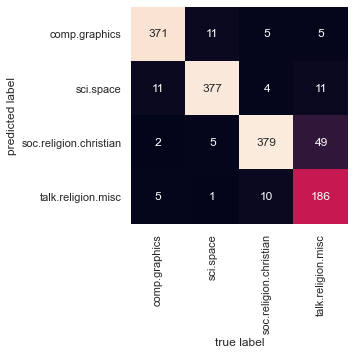

In [37]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## More Advanced Techniques:
1. [Removing stopwords](https://en.wikipedia.org/wiki/Stop_word) (The election was over - > election over)
2. [Lemmatizing words](https://en.wikipedia.org/wiki/Lemmatisation) (election, elections, elected - > election)
3. [Using n-grams:](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html#n-grams) for example in our case the Los angeles would be counted as "Los" and "angeles"
4. [Using TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)  Instead of just counting frequency we could do something more advanced like also penalizing words that appear frequently in most of the texts.

# Guassian Naive Bayes Classification using Wine data


Given a class variable $y$ and a feature vector [$x_1$ $\dots$ $x_n$], Naive Bayes assumption states the following relationship:
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n)}$$

Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:
$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$ 
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

and we can use Maximum A Posteriori(MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class $y$ in the training set.

***GaussianNB ()*** implements the Gaussian Naive Bayes algorithm for classification. **The likelihood of the features is assumed to be Gaussian**:

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}) $$

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data and perform basic exploratory analysis

#### Data set

In [39]:
import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
print(data.feature_names)
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['wine'] = data.target
df.head(10)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


#### Basic statistics of the features

In [40]:
df.iloc[:,1:].describe()

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [41]:
df.columns
a = df.values
print(type(a))
df.columns
df.index

<class 'numpy.ndarray'>


RangeIndex(start=0, stop=178, step=1)

#### Boxplots by output labels/classes

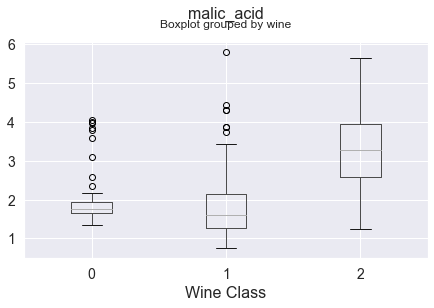

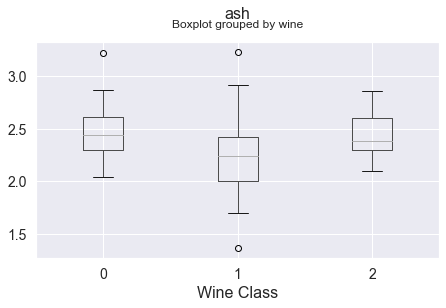

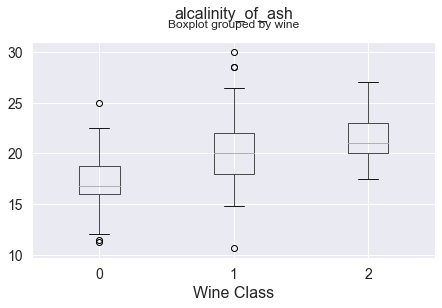

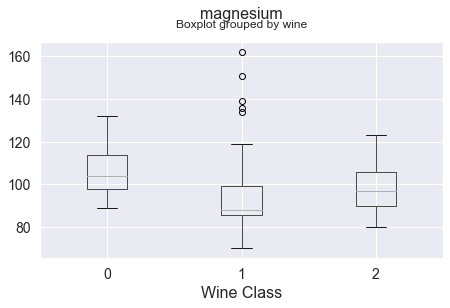

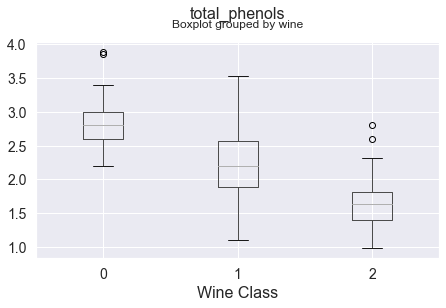

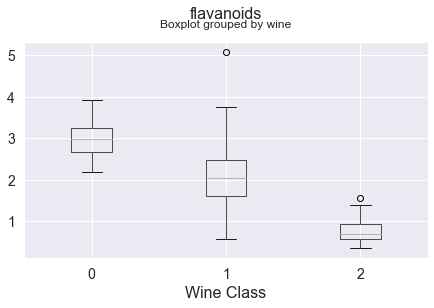

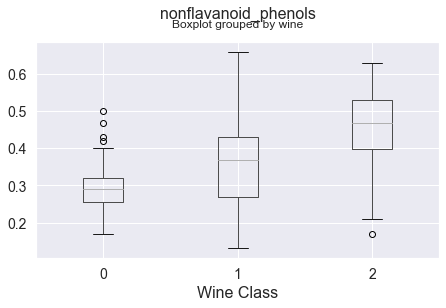

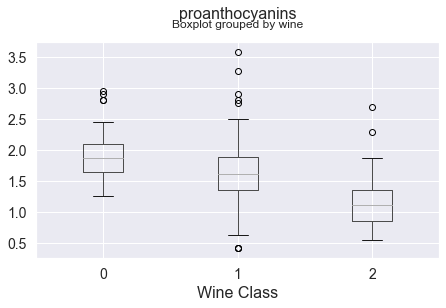

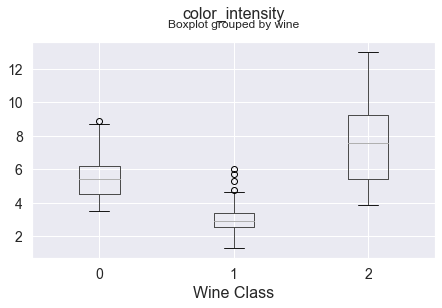

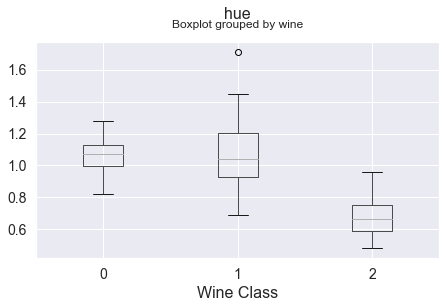

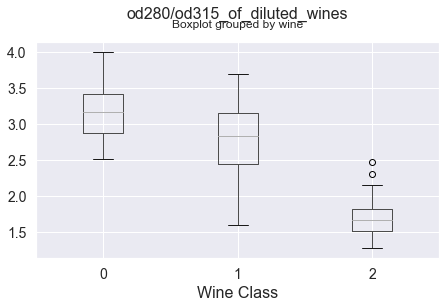

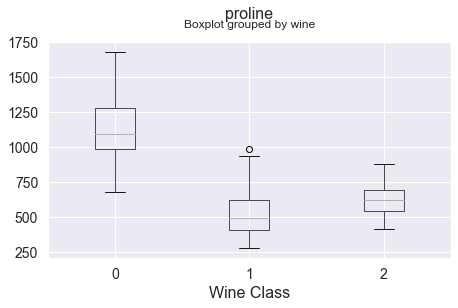

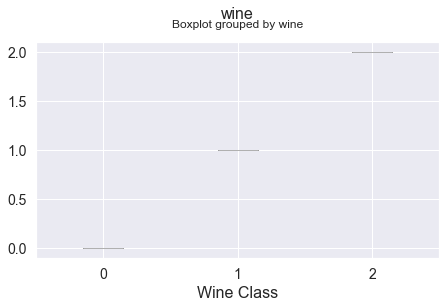

In [42]:
for c in df.columns[1:]:
    df.boxplot(c,by='wine',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

Below is an example of class seperation using two variables

Text(0, 0.5, 'Flavanoids')

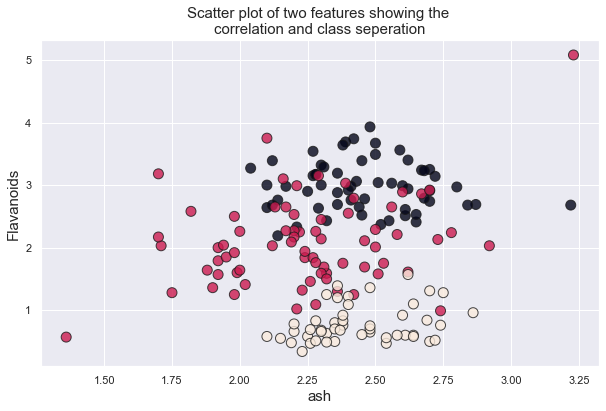

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(df['ash'.lower()],df['flavanoids'.lower()],c=df['wine'],edgecolors='k',alpha=0.8,s=100)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("ash",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)

#### Are the features independent? Plot co-variance matrix

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.

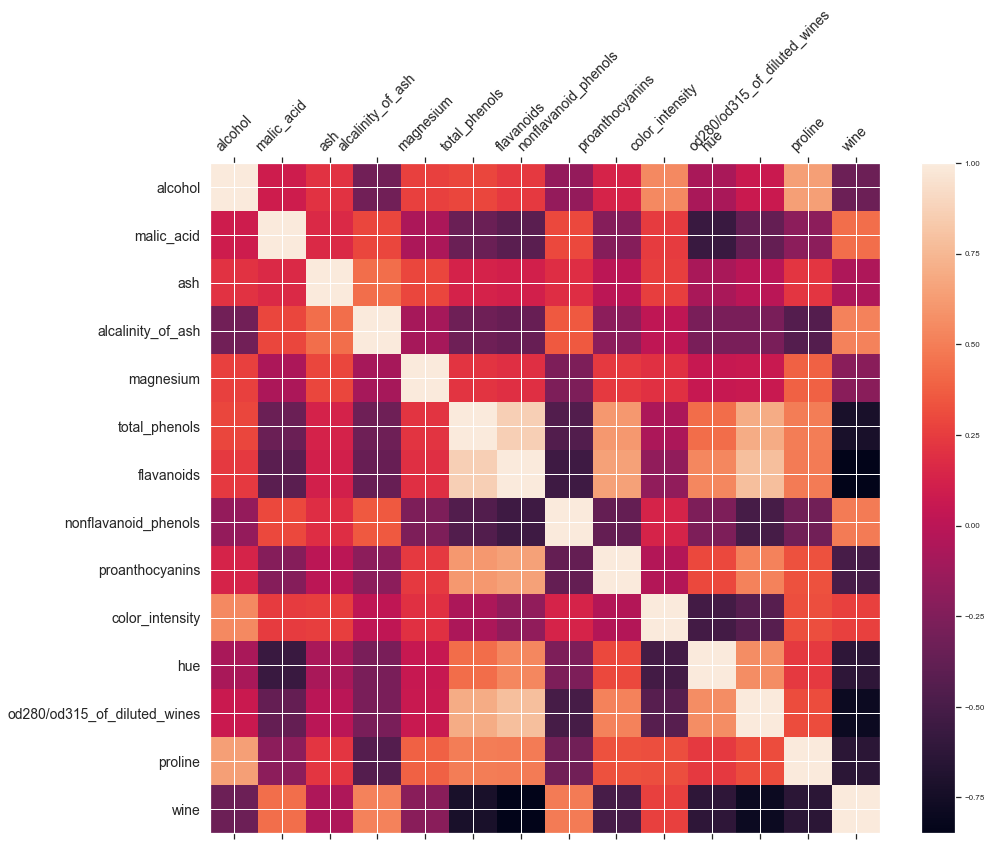

In [45]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    print(labels)
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

# correlation_matrix(df)

# plt.matshow(df.corr())
# plt.show()

# or alternatively
f = plt.figure(figsize=(15, 12))
plt.matshow(df.corr(method='pearson'), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)


## Naive Bayes Classification

#### Test/train split

In [46]:
from sklearn.model_selection import train_test_split

test_size=0.3 # Test-set fraction

In [47]:
X = df.drop('wine',axis=1)
y = df['wine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [48]:
X_train.shape

(124, 13)

In [ ]:
X_train.head()

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
nbc = GaussianNB()

In [51]:
nbc.fit(X_train,y_train)

GaussianNB()

#### Prediction, classification report, and confusion matrix

In [52]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 54 test samples is 1


In [53]:
from sklearn.metrics import classification_report

In [54]:
print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.96      1.00      0.98        27
           2       1.00      0.90      0.95        10

    accuracy                           0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Class 1','Class 2',' Class 3'], columns=['Class 1','Class 2',' Class 3'])
print("The confusion matrix looks like following...\n")
cmdf

The confusion matrix looks like following...



,Class 1,Class 2,Class 3
Class 1,17,0,0
Class 2,0,27,1
Class 3,0,0,9



** This showed that even in the presence of corrletation among features, the Naive Bayes algorithm performed quite well and could seperate the classes easily ** 